In [1]:
## 모형 불러오기
import trimesh
import numpy as np
from jmespath.ast import projection

model = trimesh.load('./obj/model.stl')

In [2]:
samples, face_indexes = trimesh.sample.sample_surface_even(model, 300)

normals = []
tangents = []

# 각 샘플링된 점에 대해 법선 벡터 추가
for i in range(len(samples)):
    sample = samples[i]  # 표면 위의 샘플링된 점
    face_index = face_indexes[i]  # 해당 점이 속한 삼각형 면의 인덱스

    # 삼각형 면의 노말 벡터 가져오기
    normal = model.face_normals[face_index]

    # 샘플 점에서의 노말 벡터 추가
    normals.append(normal)
    
    # # 메시 0번의 꼭짓점 좌표를 이용하여 찬젠트 벡터 계산
    # tangent_vector_point = model.triangles[face_index][0]
    # vector  = np.subtract(tangent_vector_point, sample) 
    # tangent = np.cross(vector, normal)
    # 
    # # 탄젠트 벡터 정규화 (길이 1로 만들기)
    # tangent_norm = np.linalg.norm(tangent)
    # if tangent_norm != 0:
    #     tangent = tangent / tangent_norm
    # 
    # tangents.append(tangent)

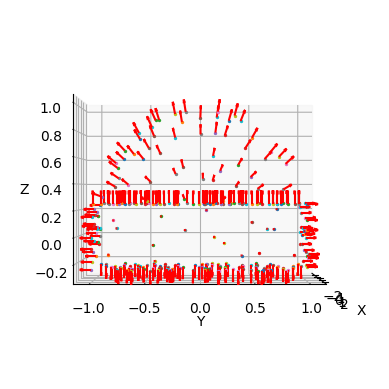

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 샘플링된 점과 그 점에서의 법선 벡터 시각화
for i in range(len(samples)):

    # 샘플링된 점 그리기
    ax.scatter(samples[i][0], samples[i][1], samples[i][2], marker= 'o', s=2)

    # 법선 벡터 그리기
    ax.quiver(samples[i][0], samples[i][1], samples[i][2],
              normals[i][0], normals[i][1], normals[i][2],
              length=0.1, color='red')

    # # 탄젠트 벡터 그리기
    # ax.quiver(samples[i][0], samples[i][1], samples[i][2],
    #           tangents[i][0], tangents[i][1], tangents[i][2],
    #           length=0.1, color='green')

# 축과 제목 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=0)

plt.show()

## 오일러 방식
## 야코비 반복법

임의의 점 p1 선택 > kdtree 이용해서 p1에서 가장 가까운 점 k개 선택 > k개의 점 중 가장 멀리 있는 점 선택 > p2, p1 차분하여 벡터 v1 생성 > v1과 p1의 탄젠트 벡터 내적

In [4]:
from scipy.spatial import cKDTree

tree = cKDTree(samples)

projections = []
update_samples = samples.copy()

for i in range(len(update_samples)):
    distance, index = tree.query(update_samples[i], k=2)
    p2_index = np.argmax(distance)
    p2 = update_samples[p2_index]

    v1 = np.subtract(p2, update_samples[i])
    projection = v1 - np.dot(v1, normals[i]) * normals[i]

    projections.append(projection)

    update_samples[i] += 0.1 * projection

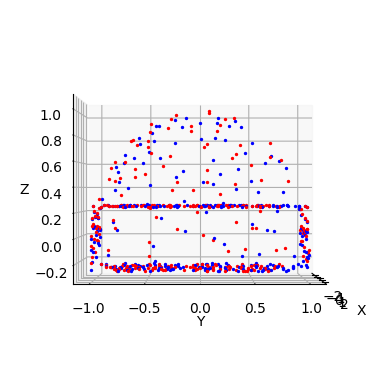

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 샘플링된 점과 그 점에서의 법선 벡터 시각화
for i in range(len(samples)):

    # 샘플링된 점 그리기
    ax.scatter(samples[i][0], samples[i][1], samples[i][2], marker= 'o', s=2, color= 'blue')

    # 샘플링된 점 그리기
    ax.scatter(update_samples[i][0], update_samples[i][1], update_samples[i][2], marker= 'o', s=2, color= 'red')

# 축과 제목 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=0)

plt.show()

In [6]:
projection

TrackedArray([ 3.96357285, -0.26095662,  0.        ])